# PHYS 1321: Computational Methods in Physics
## Problem Set 2 - Due Sep 9, 2016 at 23:59
### Adapted from materials from Brian D'Urso

* Complete the following problems.
* Fork and clone the GitHub repository for this assignment
* Complete your own version of this iPython Notebook and commit and create a pull request to submit.

Your writeup in this iPython Notebook should include:

1.  Answers to specific questions in the problem.
2.  The parameters used to generate your results.
3.  The text output of your code, if it is not trivial.
4.  Images of all plots your code produces.

### Problem 1 : Apply a Function to a Vector

Given a vector $v = (2, 3,-1)$ and a function $f(x) = x^3 + xe^x + 1$:  
a. Apply $f$ to each element in $v$.  
b. Calculate $f(v)$ as $v^3 + ve^v + 1$ using vector computing rules.  
c. Show that the two results are equal.

In [15]:
import numpy as np

def f(x):
    return x**3 + x*np.exp(x) + 1

v = array([2, 3, -1], float)
new_v = [ ]

for i in v:
    new_v.append(f(i))

print(new_v)
print(f(v)) 
print("Does new_v equal f(v)? new_v == f(v):", new_v == f(v), sep=' ')



[23.778112197861301, 88.256610769562997, -0.36787944117144233]
[ 23.7781122   88.25661077  -0.36787944]
Does new_v equal f(v)? new_v == f(v): [ True  True  True]


### Problem 2 : Vectorized Functions
 A function with many applications in science is defined as

$$h(x)=\frac{1}{2\pi}e^{-\tfrac{1}{2}x^2}$$

a.  Make a function which creates list of $(x, h(x))$ pairs using a `for` loop for $n$ uniformly spaced $x$ coordinates in $[-4, 4]$. Show the output.

b.  Vectorize the code in part (a) by creating the $x$ values using the `numpy.linspace` function and by evaluating $h(x)$ for an array argument. Combine the two arrays into a 2-D array, print the values, and plot the resulting points.

[(-4.0, 5.3390535453281935e-05), (-3.0, 0.0017680517118520167), (-2.0, 0.021539279301848634), (-1.0, 0.096532352630053914), (0.0, 0.15915494309189535), (1.0, 0.096532352630053914), (2.0, 0.021539279301848634), (3.0, 0.0017680517118520167), (4.0, 5.3390535453281935e-05)]


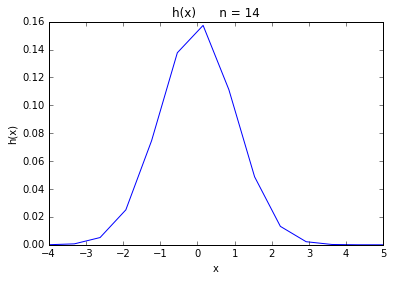

In [53]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def h(x):
    return 1/(2*pi) * np.exp(-1/2*x**2)

def build_list(n):
    coordinates = [ ]
    delta = 8/(n-1) # the range of [-4, 4] is 8
    
    for i in range(n):
        x = -4 + i*delta
        coordinates.append((x, h(x)))
    
    return coordinates

print(build_list(9))

n= 14

x = np.linspace(-4, 5, n)
y = h(x)
points = np.empty((2,n))
points[0,:] = x
points[1,:] = y
plt.plot(points[0,:], points[1,:])
plt.xlabel("x")
plt.ylabel("h(x)")
plt.title("h(x)      n = 14")

### Problem 3 : Demonstrate Array Slicing
 Write a function which creates an array `w` with values `0`, `0.1`, `0.2`, ... , `3`, then show the output of the following:

1.  `w[:]`
2.  `w[:-2]`
3.  `w[::5]`
4.  `w[2:-2:6]`

Convince yourself in each case that you understand which elements of the array that are printed.

In [46]:
import numpy

w = numpy.linspace(0, 3, 31)
print(w[:])
print(w[:-2])
print(w[::5])
# print([2:-2:6]) This one gives a syntax error...

[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3  1.4
  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7  2.8  2.9
  3. ]
[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3  1.4
  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7  2.8]
[ 0.   0.5  1.   1.5  2.   2.5  3. ]


### Problem 4 : Plot a Formula
 Make a plot of the function $y(t) = v_0 t - 0.5gt^2$ for an input $v_0$, $g = 9.81$, and $n$ equally spaced points with $t$ from $0$ to $2v_0/g$. The label on the x axis should be `time [s]`, the label on the y axis should be `height [m]`, and the plot title should be `Problem 4`. 
 
 From now on, **all** plots should have a descriptive title and axis labels.

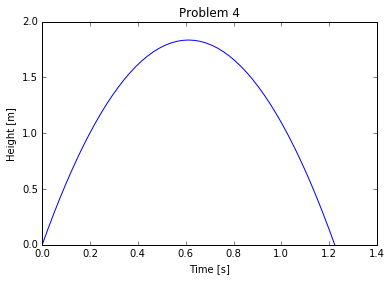

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

v = 6 # just putting a random initial velocity in

def y(t):
    return v*t - 0.5*9.81*t**2

x_values = np.linspace(0, 2*v/9.81, 50 + 1)
y_values = y(x_values)

plt.plot(x_values, y_values)
plt.ylabel("Height [m]")
plt.xlabel("Time [s]")
plt.title("Problem 4")


In [ ]:
a = np.linspace(0, 100)
print(type(a))
print(len(a))
b = np.linspace(0, 100, 101) # difference != number of intervals...
print(b)

In [ ]:
x = np.linspace(0, 3*2*np.pi, 101)
y = np.sin(x)
plt.plot(x, y)
plt.plot(2, 2*y)
plt.xlabel("Angle [rad]")
plt.ylabel("Amplitude [ ]")


### Problem 5 : Plot Exact and Inexact F-C Formulas
 In Problem Set 01, we introduced a simple rule to quickly compute the Celsius temperature from the Fahrenheit degrees: $F = 2C+30$. Compare this curve against the exact curve $F = \tfrac{9}{5}C+32$ in a plot. Let $C$ vary between -20 and 120 with $n$ equally spaced points, using points and lines. Make sure the two sets of data use different colors or symbols.

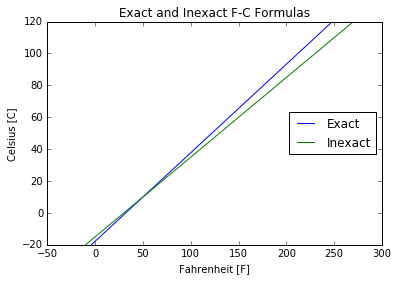

In [14]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

n
C = np.linspace(-20, 120, n+1)
y1 = 9/5*C + 32
y2 = 2*C + 30

plt.plot(y1, C, label="Exact")
plt.plot(y2, C, label="Inexact")
plt.xlabel("Fahrenheit [F]")
plt.ylabel("Celsius [C]")
plt.title("Exact and Inexact F-C Formulas")
plt.legend(loc="right")


### Problem 6 : Interpolation
Imagine we have $n+1$ measurements of some quantity $y$ that depends on $x$: $(x_0, y_0)$, $(x_1, y_1)$, …, $(x_n, y_n)$. We may think of $y$ as a function of $x$ and ask what $y$ is at some arbitrary point $x$ not coinciding with any of the $x_0$, …, $x_n$. This problem is known as interpolation. One way to solve this problem is to fit a continuous function that goes through all the $n + 1$ points and then evaluate this function for any desired $x$. A candidate for such a function is the polynomial of degree $n$ that goes through all the points.  We can call this polynomial $p_L(x)$ and write it as:

$$p_L(x) = \sum_{k=0}^n y_k L_k(x)$$

where

$$L_k(x) = \prod_{i=0,i\neq k}^n \frac{x-x_i}{x_k-x_i}$$

The $\prod$ notation is the multiplicative equivalent of $\sum$.  I.e., instead of summing the terms, the terms are multiplied, e.g.,

$$\prod_{i=0,i\neq k}^n x_i = x_0 x_1 \cdots x_{k-1}x_{k+1}\cdots x_n$$

The polynomial $p_L(x)$ is known as Lagrange’s interpolation formula, and the points $(x_0, y_0)$, …, $(x_n, y_n)$ are called interpolation points.

----
_Use Lagrange’s interpolation formula to interpolate $\sin{x}$ over the range $[0, 2\pi]$._

In this problem you will write code to implement Lagrange interpolation.  You will write two key functions: $p_L(x)$ and $L_k(x)$.

* Begin with $n+1$ interpolation points evenly spaced in $[0, 2\pi]$.
* Write a function `Lk(x, points)` that evaluates the alues of $L_k(x)$.  `points` is the set of $n+1$ interpolation points.  I recommend storing this as a two-dimensional array points, such that `points[i,0]` is the $x$ coordinate of point number $i$ and `points[i,1]` is the corresponding $y$ coordinate.
* Write a function `lagrange(x, points)` that evaluates $p_L$ at the point $x$ given a set of `points`.

To verify the program, we observe that $L_k(x_k) = 1$ and that $L_k(x_i) = 0$ for $i \neq k$, implying that $p_L(x_k) = y_k$. That is, the interpolation function should exactly match the original function at the interpolation points. Plot the original function $\sin{(x)}$ at the $n+1$ interpolation points, and connect those points with lines.

* Plot the interpolation function $p_L(x)$, and the error $p_L(x)-\sin(x)$ with points on the same plot with different colors and/or symbols for $m$ evenly spaced points along $x$ with $x \in [0, 2\pi]$ and $m\gg n$.  
* Print the maximum magnitude of the error.
* Describe how many points ($n+1$) are needed to make the error less than $0.01$ over the entire range.
* Does the maximum error keep decreasing for increasing $n$?
* At what $n$ does the error seem to be minimum, and what is the minimum error?
* Why might the maximum error increase with higher $n$?

max error: 4.0889719114e-06
min error: 0.0


"The error gets smaller than 0.01 over the entire range when n = 9. When\nn is small (smaller than 9, I suppose), the error is greater. However, if\nn gets too big, error gets large again. There's a sort of 'sweetspot'\nsomewhere. So no, the error does not continually increase as n increases."

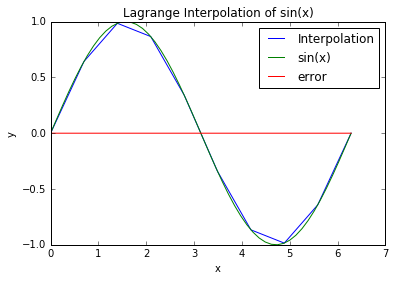

In [65]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

n = 9
x1 = np.linspace(0, 2*np.pi, n+1)
x2 = np.linspace(0, 2*np.pi)
y = np.sin(x)

    
def L_k(x, k, x_values):
    product = 1

    for i in range(n+1):
        if i == k:
            continue
        product *= L_k_i(x, k, i, x_values)
        
    return product
    
def L_k_i(x, k, i, x_values):
    return (x - x_values[i]) / (x_values[k] - x_values[i])

def p_L(x):
    total = 0
    
    for k in range(0, n+1):
        total += y_values[k] * L_k(x, k, x_values)
        
    return total



plt.plot(x1, p_L(x1), label="Interpolation")
plt.plot(x2, np.sin(x2), label="sin(x)")
plt.plot(x1, error, label="error")
plt.title("Lagrange Interpolation of sin(x)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc="best")

error = p_L(x1)-np.sin(x1)
print("max error:", max(abs(error)))
print("min error:", min(abs(error)))



# The error gets smaller than 0.01 over the entire range when n = 9. When
# n is small (smaller than 9, I suppose), the error is greater. However, if
# n gets too big, error gets large again. There's a sort of 'sweetspot'
# somewhere. So no, the error does not continually increase as n increases.
# As per wikipedia, this happens because the Lagrange polynomial oscillates
# especially at the edges.'''


            